# Machine Learning - Supervised Regression _ Practical Examination -2023

### Data_set: 
Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Attribute Information:



Name -- Data Type -- Measurement -- Description

    Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
    Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
    Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
    Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
    Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
    Age -- quantitative -- Day (1~365) -- Input Variable
    Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [54]:
# Kindly change the below cells from markdown to code and execute it 

import pandas as pd

import csv

with open("concrete.csv","r")as file:

reader=csv.reader(file)
df=pd.read_csv("data_set.csv")

df.head()

In [55]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer,StandardScaler



#### 1.	Data Understanding (10 marks)


a.	Read the dataset. What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (2 MARK)

b.	Calculate five-point summary for numerical variables (2 MARK)

c.	Summarize observations for categorical variables – no. of categories, % observations in each category. (2 marks)

d.	Check for defects in the data such as missing values, null, outliers, etc. (2 marks)

e. Is the data normally distributed? Is it a defect? Why or why not? (2 Mark)

In [56]:
data=pd.read_csv(r'C:\Users\priya\SRM PYTHON\IS\Practicals\Concrete+(1).csv')
org_data=data.copy()
data.head(5)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.000000,0.000000,0.000000,162.000000,2.500000,1040.000000,676.000000,28,79.990000
1,540.000000,0.000000,0.000000,162.000000,2.500000,1055.000000,676.000000,28,61.890000
2,332.500000,142.500000,0.000000,228.000000,0.000000,932.000000,594.000000,270,40.270000
3,332.500000,142.500000,0.000000,228.000000,0.000000,932.000000,594.000000,365,41.050000
4,198.600000,132.400000,0.000000,192.000000,0.000000,978.400000,825.500000,360,44.300000


In [57]:
#a. Read the dataset. What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (2 MARK)
data.shape

(1030, 9)

In [58]:
# type of variable 
data.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

### INFERENCE: <font color='blue'> There are 1030 rows and 9 columns </font>

In [62]:
# b. Calculate five-point summary for numerical variables (2 MARK)
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [116]:
#c. Summarize observations for categorical variables – no. of categories, % observations in each category. (2 marks)

### INFERENCE: <font color='blue'> All columns are numerical in nature. There are no categorical variable. All are continuous in nature with 'age' in integer format while rest all are of float datatype.</font>

In [91]:
#d. Check for defects in the data such as missing values, null, outliers, etc. (2 marks)
# missing value
data.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

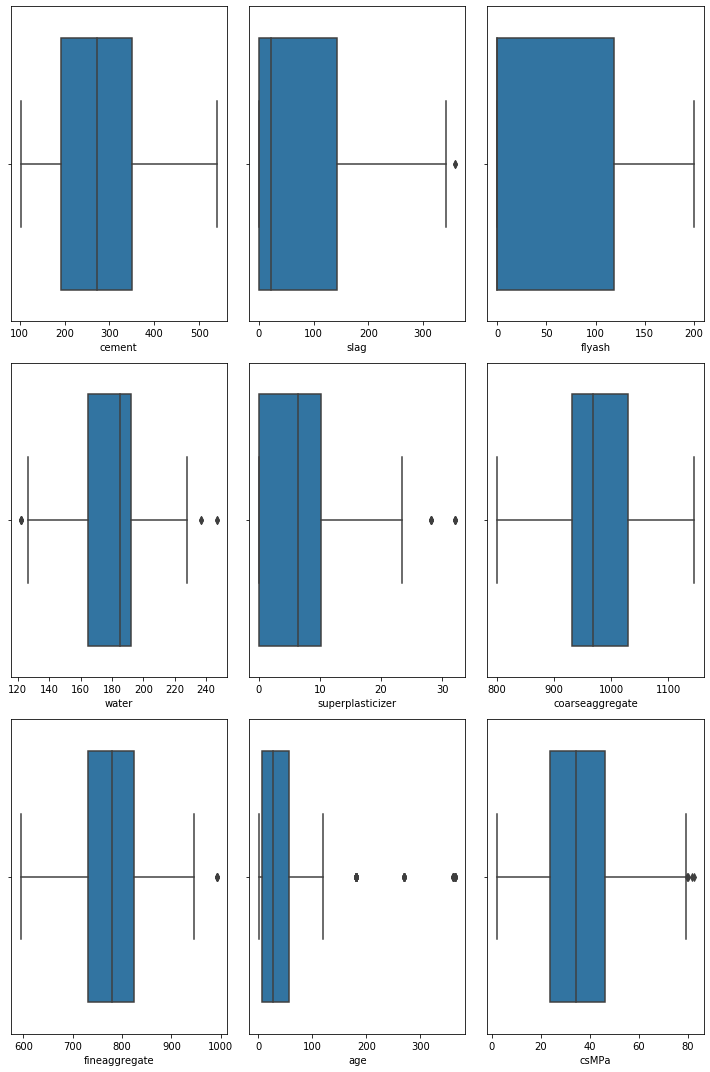

In [64]:
# outlier
col=data.columns
col
# outlier
plt.figure(figsize=(10,15))
for i in range(0,len(col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data[col[i]]) 
    
plt.tight_layout()
plt.show()    

### INFERENCE: <font color='blue'> There are no missing values. Outliers are present in 6 columns:  'slag', 'water','superplasticizer','fineaggregate' , 'age'and 'csMPa.'</font>

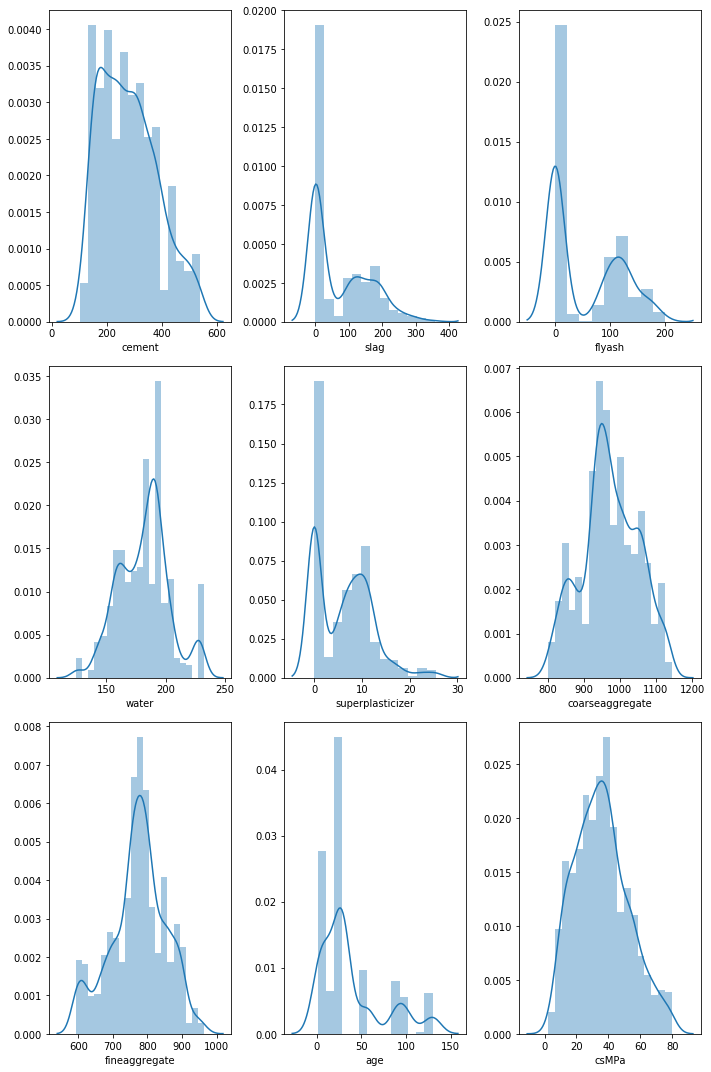

In [94]:
#e. Is the data normally distributed? Is it a defect? Why or why not? (2 Mark)
plt.figure(figsize=(10,15))
for i in range(0,len(col)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[col[i]]) 
    
plt.tight_layout()
plt.show()

### INFERENCE: <font color='Green'> By looking at  the distplot, we can conclude that data is not normally distributed.</font>


#### 2.	Data Preparation (15 marks)

a.	Fix the defects found above and do appropriate treatment if any. (5 marks)

b.	Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? (5 marks)

c.	Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (2 marks)

d.	Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (3 marks)

 

In [66]:
#a. Fix the defects found above and do appropriate treatment if any. (5 marks)

def find_cap_outlier(col):
    Q1=col.quantile(0.25)
    Q3=col.quantile(0.75)
    lb=(Q1 - 1.5*(Q3-Q1))    # LB=Q1-1.5*IQR 
    ub=(Q3 + 1.5*(Q3-Q1))    # UB=Q3+1.5*IQR
    print('Upper bound=',ub)
    print('Lower bound=',lb)
    out_ind=np.where((col > ub) | (col < lb))
    index=list(out_ind[0])
    outlier_val=[]
    for i in index:
        outlier_val.append(col.loc[i])
    return index,ub,lb;


def cap_outlier(col_nm,UB,LB):
    data[col_nm]=np.where(data[col_nm] > UB, UB,
                 np.where(data[col_nm] < LB, LB, data[col_nm]))
    print(col_nm)

In [118]:
# Finding outlier index and  Capping outlier
outlier_column=['slag', 'water','superplasticizer','fineaggregate' , 'age', 'csMPa']

for i in outlier_column:
    out_ind,Upper_bd,Lower_bd=find_cap_outlier(data[i])
    cap_outlier(i,Upper_bd,Lower_bd)


Upper bound= 357.375
Lower bound= -214.42499999999998
slag
Upper bound= 232.64999999999998
Lower bound= 124.25000000000001
water
Upper bound= 25.5
Lower bound= -15.299999999999999
superplasticizer
Upper bound= 963.575
Lower bound= 591.3749999999998
fineaggregate
Upper bound= 129.5
Lower bound= -66.5
age
Upper bound= 79.77250000000001
Lower bound= -9.927500000000013
csMPa


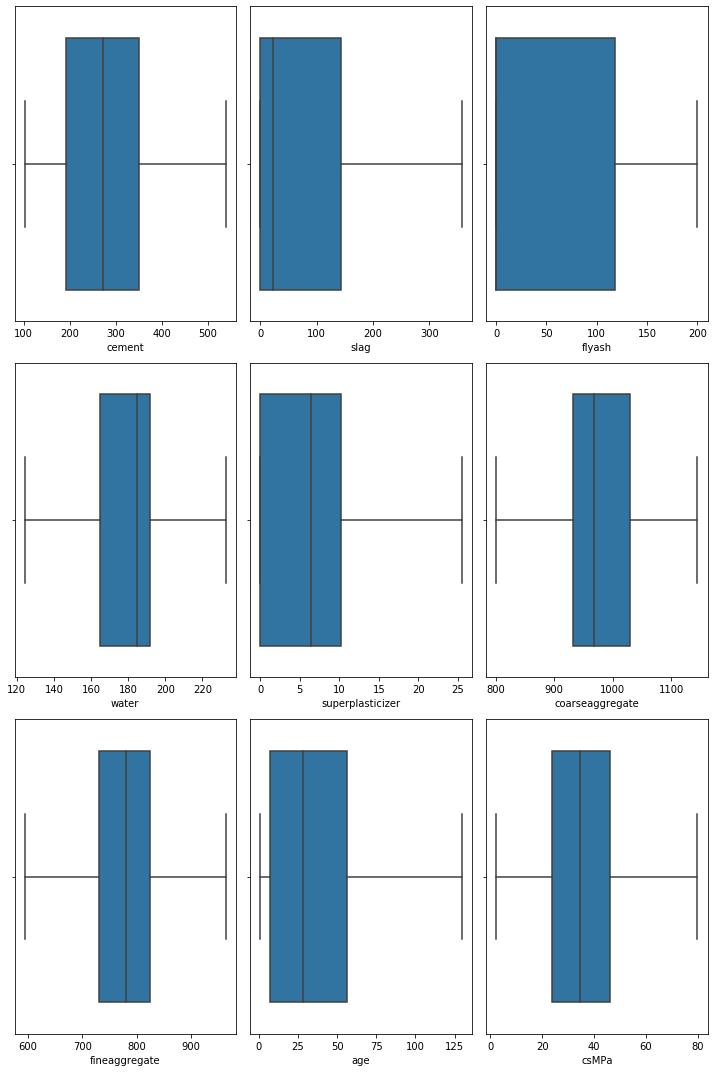

In [119]:
col=data.columns
col
# Rechecking outlier values 
plt.figure(figsize=(10,15))
for i in range(0,len(col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data[col[i]]) 
    
plt.tight_layout()
plt.show()   

### INFERENCE: <font color='Green'> Now outlier found in all six columns are replaced with either upper bound or lower bound values.</font>


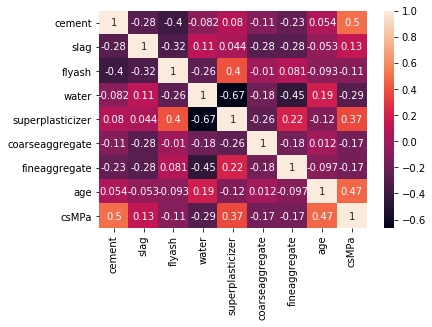

In [71]:
#b. Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? (5 marks)
sns.heatmap(data.corr(), annot = True)

In [82]:
data.corr().loc['csMPa'].sort_values(ascending=False)

csMPa               1.000000
cement              0.498008
age                 0.469807
superplasticizer    0.366235
slag                0.134621
flyash             -0.105577
coarseaggregate    -0.165250
fineaggregate      -0.169601
water              -0.290969
Name: csMPa, dtype: float64

### INFERENCE: <font color='blue'> From the last row of heatmap, we can see that column 'cement' and 'age' has very high correlation with output column 'csMPa'.

In [117]:
#c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (2 marks)

### INFERENCE: <font color='blue'> Eventhough few variables has very low correlation values, we can keep those features because they are significant in real world.

In [73]:
#d. Split dataset into train and test (70:30). 
#Are both train and test representative of the overall data? How would you ascertain this statistically? (3 marks)

# Output is to predict the Concrete compressive strength -- csMPa
out=data['csMPa']
out1=out.copy()

# Input is all the columns except 'csMPa' 
inp=data.drop(columns=['csMPa'])


xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3)

print("Shape of input data:", inp.shape)
print("xtrain=",xtrain.shape)
print("xtest=",xtest.shape)

print("Shape of output data:",out.shape)
print("ytrain=",ytrain.shape)
print("ytest=",ytest.shape)

Shape of input data: (1030, 8)
xtrain= (721, 8)
xtest= (309, 8)
Shape of output data: (1030,)
ytrain= (721,)
ytest= (309,)


In [95]:
xtrain.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,279.604854,72.330999,55.125381,182.360610,6.029404,975.426768,771.019279,38.278086
std,101.941366,84.920998,64.287195,21.598919,5.747342,77.979815,81.046157,36.494644
min,102.000000,0.000000,0.000000,124.250000,0.000000,801.000000,594.000000,1.000000
25%,194.700000,0.000000,0.000000,164.900000,0.000000,932.000000,721.000000,7.000000
50%,266.000000,22.000000,0.000000,185.700000,6.100000,968.000000,777.500000,28.000000
75%,349.000000,142.500000,118.300000,193.000000,10.200000,1040.000000,822.200000,56.000000
max,540.000000,357.375000,200.000000,232.650000,25.500000,1145.000000,963.575000,129.500000


In [96]:
xtest.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,284.814887,77.533981,52.001942,179.636084,6.461489,967.067314,779.086974,37.585761
std,110.344273,89.361187,63.364334,20.231792,5.927460,77.032497,76.698154,34.114945
min,116.000000,0.000000,0.000000,124.250000,0.000000,801.000000,594.000000,3.000000
25%,190.000000,0.000000,0.000000,164.900000,0.000000,926.100000,746.600000,14.000000
50%,277.100000,24.000000,0.000000,181.700000,7.000000,967.000000,781.500000,28.000000
75%,362.600000,145.000000,112.000000,192.000000,10.400000,1014.300000,825.500000,56.000000
max,540.000000,342.100000,200.100000,228.000000,25.500000,1130.000000,963.575000,129.500000


In [97]:
ytrain.describe()

count   721.000000
mean     35.292101
std      16.606602
min       2.330000
25%      22.630000
50%      33.760000
75%      45.080000
max      79.772500
Name: csMPa, dtype: float64

In [98]:
ytest.describe()

count   309.000000
mean     37.027330
std      16.852260
min       4.780000
25%      24.500000
50%      35.960000
75%      48.280000
max      79.772500
Name: csMPa, dtype: float64

### INFERENCE: <font color='Green'> From the describe results, we can say that ytest and ytrain are more statistically similar. While xtrain and xtest has moderate differnces. There are few columns like 'cement' and 'superplasticizer' with significant differnce in mean values. </font>


### 3.	Model Building (15 marks)

a.	Fit a base model.

b.  Observe the overall R- Squared, RMSE and MAPE values of the model. Please comment on whether it is good or not.  




In [114]:
# a. Fit a base model.

In [100]:
#from sklearn.linear_model import LinearRegression
lr = LinearRegression()
ypred= lr.fit(xtrain, ytrain).predict(xtest)

In [101]:
inpc=sm.add_constant(inp)
mod=sm.OLS(out1,inpc)
ols_mod=mod.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     343.4
Date:                Sat, 21 Jan 2023   Prob (F-statistic):          2.85e-283
Time:                        15:05:33   Log-Likelihood:                -3687.9
No. Observations:                1030   AIC:                             7394.
Df Residuals:                    1021   BIC:                             7438.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.8247     22.441     -0.170      0.865     -47.860      40.210
cement               0.1139      0.007     15.993      0.000       0.100       0.128
slag                 0.0969      0.008     11.425      0.000       0.080       0.113
flyash               0.0765      0.011      7.279      0.000       0.056       0.097
water               -0.1758      0.034     -5.123      0.000      -0.243      -0.108
superplasticizer     0.2596      0.083      3.141      0.002       0.097       0.422
coarseaggregate      0.0093      0.008      1.176      0.240      -0.006       0.025
fineaggregate        0.0103      0.009      1.143      0.253      -0.007       0.028
age                  0.2530      0.008     32.418      0.000       0.238       0.268
==============================================================================
Omnibus:                        6.268   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                7.045
Skew:                           0.108   Prob(JB):                       0.0295
Kurtosis:                       3.343   Cond. No.                     1.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### INFERENCE: <font color='Green'>From the OLS summary, we can say that R2 value is nearly equal to 0.72, which means for any change in input or independent variables, there will be nearly 72 % change in output or target variable.

### <font color='Green'>The data also has a strong multi collinearity.</font>


In [84]:
# To handle multicollinearity

vif=pd.DataFrame()
vif['features']=inp.columns
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif.sort_values('VIF',ascending=False)

,features,VIF
5,coarseaggregate,85.208452
3,water,82.404805
6,fineaggregate,72.789987
0,cement,15.551495
4,superplasticizer,5.787237
2,flyash,4.271344
1,slag,3.373500
7,age,2.249178


### INFERENCE: <font color='Green'>From the VIF result , we can say that 'coarseaggregate', 'fineaggregate', 'water' has high multi- correlation in the dataset. Lets try dropping features that has high correlation.</font>

In [85]:
inp1=inp.drop('coarseaggregate',axis=1)
vif=pd.DataFrame()
vif['features']=inp1.columns
vif['VIF']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]
vif.sort_values('VIF',ascending=False)

,features,VIF
3,water,72.259537
5,fineaggregate,48.745497
0,cement,14.624787
4,superplasticizer,5.721247
2,flyash,4.090715
1,slag,3.344039
6,age,2.248150


In [86]:
inp2=inp1.drop('fineaggregate',axis=1)
vif=pd.DataFrame()
vif['features']=inp2.columns
vif['VIF']=[variance_inflation_factor(inp2.values,i) for i in range(inp2.shape[1])]
vif.sort_values('VIF',ascending=False)

,features,VIF
3,water,21.649099
0,cement,14.336074
4,superplasticizer,4.025402
2,flyash,3.993553
1,slag,3.058662
5,age,2.235123


### INFERENCE: <font color='Green'>We have dropped  'coarseaggregate' and 'fineaggregate' feature but still left with water. Water cannot be dropped as it is an important factor in predicting 'csMPa'. Lets try to fit a model again by ignoring these 2 variables also.</font>

In [113]:
out2=data['csMPa']

# Input is all the columns except 'coarseaggregate', 'fineaggregate', 'csMPa'
inp2=data.drop(columns=['coarseaggregate', 'fineaggregate', 'csMPa'])
                   
xtrain1,xtest1,ytrain1,ytest1=train_test_split(inp2,out2,test_size=0.3,random_state=40)


lr = LinearRegression()
ypred1= lr.fit(xtrain1, ytrain1).predict(xtest1)

inpc=sm.add_constant(inp2)
mod=sm.OLS(out2,inpc)
ols_mod=mod.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     457.8
Date:                Sat, 21 Jan 2023   Prob (F-statistic):          1.30e-285
Time:                        15:12:53   Log-Likelihood:                -3688.7
No. Observations:                1030   AIC:                             7391.
Df Residuals:                    1023   BIC:                             7426.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               23.0431      3.554      6.484      0.000      16.069      30.017
cement               0.1066      0.004     29.946      0.000       0.100       0.114
slag                 0.0880      0.004     21.010      0.000       0.080       0.096
flyash               0.0668      0.007     10.189      0.000       0.054       0.080
water               -0.2113      0.018    -11.865      0.000      -0.246      -0.176
superplasticizer     0.2294      0.075      3.079      0.002       0.083       0.376
age                  0.2529      0.008     32.462      0.000       0.238       0.268
==============================================================================
Omnibus:                        5.631   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                6.325
Skew:                           0.095   Prob(JB):                       0.0423
Kurtosis:                       3.334   Cond. No.                     4.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### INFERENCE: <font color='Green'>Even after dropping the values R-squared value and adjusted R2 remains the same.</font>
### <font color='Green'>R-squared value = 0.729.</font>
### <font color='Green'>Adjusted R2 value = 0.727 </font>

In [77]:
#b. Observe the overall R- Squared, RMSE and MAPE values of the model. Please comment on whether it is good or not.

In [105]:
# Checking Model Metrics
print("R2 Score: ", r2_score(ytest, ypred))
print("RMSE(Root mean square error): ", np.sqrt(mean_squared_error(ytest, ypred)))
print("MAPE(Mean absolute percentage error):", np.mean(np.abs((ytest - ypred)/ytest))*100) 

R2 Score:  0.703739587045823
RMSE(Root mean square error):  9.15779834236957
MAPE(Mean absolute percentage error): 23.64277158723979


### INFERENCE: <font color='Green'> R2 value is nearly equal to 0.7, which means for any change in input or independent variables, there will be nearly 72 % change in output ortarget variable.</font>

### <font color='Green'> We can see that the RMSE value is 9.15.</font>
 
### <font color='Green'> We can see that the MAPE value is 23.6%.</font>